In [1]:
import os

import torch

from MResNet import *
from MResNetC import *
from train import *

import seaborn as sns

sns.set()


"""
Code For 
Yiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" 
Thirty-fifth International Conference on Machine Learning (ICML), 2018

@2prime @Aoxiao Zhong

Acknowledgement:
@pppppass(Zhihan Li)
"""
# %load_ext autoreload
# %autoreload 2
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"

/home/nox/repos/beyond/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


'\nCode For \nYiping Lu, Aoxiao Zhong, Quanzheng Li, Bin Dong. "Beyond Finite Layer Neural Network:Bridging Deep Architects and Numerical Differential Equations" \nThirty-fifth International Conference on Machine Learning (ICML), 2018\n\n@2prime @Aoxiao Zhong\n\nAcknowledgement:\n@pppppass(Zhihan Li)\n'

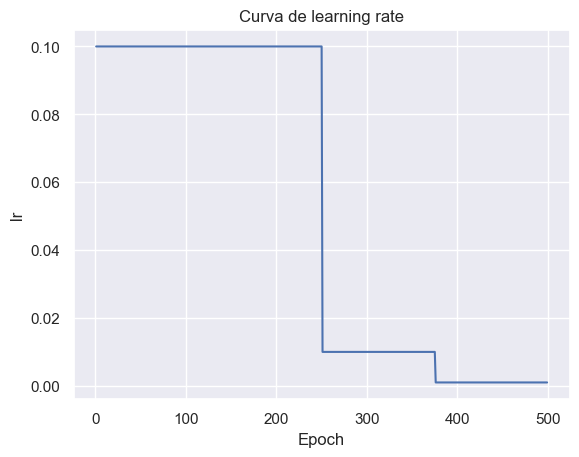

In [2]:
xs = [*range(1,500)]
ys = [lr_control({250: 0.1, 375: 0.01, 500: 0.001},x) for x in xs]

plt.figure()
plt.plot(xs, ys)
plt.title("Curva de learning rate")
plt.ylabel("lr")
plt.xlabel("Epoch")
plt.show()

# Experiments

## LMResNet-56

In [3]:
batch_size = 128
trainloader, testloader = get_cifar10(batch_size)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
from torchinfo import summary
from blocks import BasicBlock, Bottleneck, BasicBlockWithDeathRate
from MResNet import MResNet

In [5]:
net = MResNet(BasicBlockWithDeathRate, [9,9,9], num_classes=10, stochastic_depth=True, PL=0.8)
net.cuda()
model_name = "MResNet56-SD"

from pathlib import Path

p = Path(f"{model_name}.txt")
if p.exists():
    p.unlink()

summary(
    net,
    input_size=(batch_size, 3, 32, 32),
    depth=5,
    col_names=[
        "input_size",
        "output_size",
        "num_params",
        "kernel_size",
        "mult_adds",
    ],
)

[0.0, 0.007692307692307691, 0.015384615384615382, 0.023076923076923075, 0.030769230769230764, 0.03846153846153846, 0.04615384615384615, 0.05384615384615383, 0.06153846153846153, 0.0692307692307692, 0.07692307692307691, 0.08461538461538459, 0.0923076923076923, 0.09999999999999998, 0.10769230769230766, 0.11538461538461535, 0.12307692307692306, 0.13076923076923075, 0.1384615384615384, 0.1461538461538461, 0.15384615384615383, 0.16153846153846152, 0.16923076923076918, 0.17692307692307688, 0.1846153846153846, 0.19230769230769226, 0.19999999999999996]


Layer (type:depth-idx)                   Input Shape               Output Shape              Param #                   Kernel Shape              Mult-Adds
MResNet                                  [128, 3, 32, 32]          [128, 10]                 1,115                     --                        --
├─Conv2d: 1-1                            [128, 3, 32, 32]          [128, 16, 32, 32]         432                       [3, 3]                    56,623,104
├─ModuleList: 1-6                        --                        --                        (recursive)               --                        --
│    └─BasicBlockWithDeathRate: 2-1      [128, 16, 32, 32]         [128, 16, 32, 32]         --                        --                        --
│    │    └─BatchNorm2d: 3-1             [128, 16, 32, 32]         [128, 16, 32, 32]         32                        --                        4,096
│    │    └─ReLU: 3-2                    [128, 16, 32, 32]         [128, 16, 32, 32]         -

In [6]:
%%time
sgd_para = {"lr": 0.1, "weight_decay": 0.0001, "momentum": 0.9}
lr_dict = {250: 0.1, 375: 0.01, 500: 0.001}

# Trainer = NN_SGDTrainer(net,sgd_para, trainloader, testloader, {200:1e-3}, model_name + '.txt')
Trainer = NN_SGDTrainer(
    net,
    sgd_para,
    trainloader,
    testloader,
    lr_dict,
    model_name + ".txt",
)

for i in range(500):  # 100
    Trainer.train()

391it [00:23, 16.34it/s]

Epoch 1 finished, average loss: 0.0126473719
Starting testing


Correct: 5280, total: 10000, accuracy: 0.5279999971, average loss: 0.0101750449


391it [00:23, 16.36it/s]

Epoch 2 finished, average loss: 0.0088979615
Starting testing


Correct: 5671, total: 10000, accuracy: 0.5670999885, average loss: 0.0099735667


391it [00:23, 16.68it/s]

Epoch 3 finished, average loss: 0.0074370549
Starting testing


Correct: 5938, total: 10000, accuracy: 0.5938000083, average loss: 0.0095845920


391it [00:23, 16.45it/s]

Epoch 4 finished, average loss: 0.0064194742
Starting testing


Correct: 7052, total: 10000, accuracy: 0.7051999569, average loss: 0.0065425979


391it [00:23, 16.61it/s]

Epoch 5 finished, average loss: 0.0057775646
Starting testing


Correct: 7130, total: 10000, accuracy: 0.7129999995, average loss: 0.0063458877


391it [00:23, 16.65it/s]

Epoch 6 finished, average loss: 0.0052766830
Starting testing


Correct: 7339, total: 10000, accuracy: 0.7339000106, average loss: 0.0064432575


391it [00:23, 16.55it/s]

Epoch 7 finished, average loss: 0.0048428385
Starting testing


Correct: 7602, total: 10000, accuracy: 0.7601999640, average loss: 0.0056792686


391it [00:23, 16.60it/s]

Epoch 8 finished, average loss: 0.0045478220
Starting testing


Correct: 7989, total: 10000, accuracy: 0.7989000082, average loss: 0.0046448905


391it [00:23, 16.53it/s]

Epoch 9 finished, average loss: 0.0042860807
Starting testing


Correct: 7943, total: 10000, accuracy: 0.7942999601, average loss: 0.0048650380


391it [00:23, 16.63it/s]

Epoch 10 finished, average loss: 0.0040804775
Starting testing


Correct: 8091, total: 10000, accuracy: 0.8090999722, average loss: 0.0045230752


391it [00:23, 16.49it/s]

Epoch 11 finished, average loss: 0.0038754636
Starting testing


Correct: 8181, total: 10000, accuracy: 0.8180999756, average loss: 0.0041934123


391it [00:23, 16.61it/s]

Epoch 12 finished, average loss: 0.0037700047
Starting testing


Correct: 8312, total: 10000, accuracy: 0.8312000036, average loss: 0.0039070632


391it [00:23, 16.54it/s]

Epoch 13 finished, average loss: 0.0035533640
Starting testing


Correct: 8353, total: 10000, accuracy: 0.8352999687, average loss: 0.0038086456


391it [00:23, 16.62it/s]

Epoch 14 finished, average loss: 0.0034929885
Starting testing


Correct: 8348, total: 10000, accuracy: 0.8348000050, average loss: 0.0039478173


391it [00:23, 16.48it/s]

Epoch 15 finished, average loss: 0.0033250038
Starting testing


Correct: 8427, total: 10000, accuracy: 0.8427000046, average loss: 0.0037279229


391it [00:23, 16.61it/s]

Epoch 16 finished, average loss: 0.0032508135
Starting testing


Correct: 8400, total: 10000, accuracy: 0.8399999738, average loss: 0.0036773020


391it [00:23, 16.69it/s]

Epoch 17 finished, average loss: 0.0031610381
Starting testing


Correct: 8351, total: 10000, accuracy: 0.8350999951, average loss: 0.0039232088


391it [00:23, 16.55it/s]

Epoch 18 finished, average loss: 0.0030975468
Starting testing


Correct: 8383, total: 10000, accuracy: 0.8382999897, average loss: 0.0037453719


391it [00:23, 16.52it/s]

Epoch 19 finished, average loss: 0.0030009195
Starting testing


Correct: 8470, total: 10000, accuracy: 0.8470000029, average loss: 0.0037283657


391it [00:23, 16.55it/s]

Epoch 20 finished, average loss: 0.0029538222
Starting testing


Correct: 8557, total: 10000, accuracy: 0.8556999564, average loss: 0.0033907784


391it [00:23, 16.59it/s]

Epoch 21 finished, average loss: 0.0029368101
Starting testing


Correct: 8351, total: 10000, accuracy: 0.8350999951, average loss: 0.0037872392


391it [00:23, 16.54it/s]

Epoch 22 finished, average loss: 0.0028269282
Starting testing


Correct: 8575, total: 10000, accuracy: 0.8574999571, average loss: 0.0033304557


391it [00:23, 16.57it/s]

Epoch 23 finished, average loss: 0.0027449896
Starting testing


Correct: 8225, total: 10000, accuracy: 0.8224999905, average loss: 0.0044265093


391it [00:23, 16.59it/s]

Epoch 24 finished, average loss: 0.0026993710
Starting testing


Correct: 8466, total: 10000, accuracy: 0.8465999961, average loss: 0.0036702176


391it [00:23, 16.54it/s]

Epoch 25 finished, average loss: 0.0025975567
Starting testing


Correct: 8617, total: 10000, accuracy: 0.8616999984, average loss: 0.0032482178


391it [00:23, 16.60it/s]

Epoch 26 finished, average loss: 0.0025935693
Starting testing


Correct: 8625, total: 10000, accuracy: 0.8624999523, average loss: 0.0032699486


391it [00:23, 16.66it/s]

Epoch 27 finished, average loss: 0.0025755389
Starting testing


Correct: 8668, total: 10000, accuracy: 0.8667999506, average loss: 0.0030753602


391it [00:23, 16.53it/s]

Epoch 28 finished, average loss: 0.0025530699
Starting testing


Correct: 8476, total: 10000, accuracy: 0.8475999832, average loss: 0.0036385389


391it [00:23, 16.71it/s]

Epoch 29 finished, average loss: 0.0024607697
Starting testing


Correct: 8576, total: 10000, accuracy: 0.8575999737, average loss: 0.0035418044


391it [00:23, 16.66it/s]

Epoch 30 finished, average loss: 0.0024647350
Starting testing


Correct: 8576, total: 10000, accuracy: 0.8575999737, average loss: 0.0034342518


391it [00:23, 16.72it/s]

Epoch 31 finished, average loss: 0.0024366978
Starting testing


Correct: 8708, total: 10000, accuracy: 0.8707999587, average loss: 0.0030659269


391it [00:23, 16.66it/s]

Epoch 32 finished, average loss: 0.0023696902
Starting testing


Correct: 8716, total: 10000, accuracy: 0.8715999722, average loss: 0.0030823919


391it [00:23, 16.69it/s]

Epoch 33 finished, average loss: 0.0023665762
Starting testing


Correct: 8818, total: 10000, accuracy: 0.8817999959, average loss: 0.0028161523


391it [00:23, 16.70it/s]

Epoch 34 finished, average loss: 0.0023454505
Starting testing


Correct: 8729, total: 10000, accuracy: 0.8728999496, average loss: 0.0030978334


391it [00:23, 16.70it/s]

Epoch 35 finished, average loss: 0.0022881661
Starting testing


Correct: 8551, total: 10000, accuracy: 0.8550999761, average loss: 0.0034987167


391it [00:23, 16.64it/s]

Epoch 36 finished, average loss: 0.0022268102
Starting testing


Correct: 8699, total: 10000, accuracy: 0.8698999882, average loss: 0.0031064312


391it [00:23, 16.66it/s]

Epoch 37 finished, average loss: 0.0022164070
Starting testing


Correct: 8756, total: 10000, accuracy: 0.8755999804, average loss: 0.0029593233


391it [00:23, 16.64it/s]

Epoch 38 finished, average loss: 0.0021989318
Starting testing


Correct: 8862, total: 10000, accuracy: 0.8861999512, average loss: 0.0026537549


391it [00:23, 16.69it/s]

Epoch 39 finished, average loss: 0.0022071313
Starting testing


Correct: 8761, total: 10000, accuracy: 0.8761000037, average loss: 0.0030861494


391it [00:23, 16.67it/s]

Epoch 40 finished, average loss: 0.0021749881
Starting testing


Correct: 8750, total: 10000, accuracy: 0.8750000000, average loss: 0.0028885912


391it [00:23, 16.70it/s]

Epoch 41 finished, average loss: 0.0021824226
Starting testing


Correct: 8648, total: 10000, accuracy: 0.8647999763, average loss: 0.0033542497


391it [00:23, 16.68it/s]

Epoch 42 finished, average loss: 0.0021405809
Starting testing


Correct: 8740, total: 10000, accuracy: 0.8739999533, average loss: 0.0029663206


391it [00:23, 16.71it/s]

Epoch 43 finished, average loss: 0.0020824362
Starting testing


Correct: 8780, total: 10000, accuracy: 0.8779999614, average loss: 0.0031759862


391it [00:23, 16.66it/s]

Epoch 44 finished, average loss: 0.0020972006
Starting testing


Correct: 8599, total: 10000, accuracy: 0.8598999977, average loss: 0.0034294593


391it [00:23, 16.64it/s]

Epoch 45 finished, average loss: 0.0020654715
Starting testing


Correct: 8794, total: 10000, accuracy: 0.8793999553, average loss: 0.0029344137


391it [00:23, 16.66it/s]

Epoch 46 finished, average loss: 0.0020878361
Starting testing


Correct: 8731, total: 10000, accuracy: 0.8730999827, average loss: 0.0029967844


391it [00:23, 16.63it/s]

Epoch 47 finished, average loss: 0.0020286860
Starting testing


Correct: 8878, total: 10000, accuracy: 0.8877999783, average loss: 0.0025626487


391it [00:23, 16.58it/s]

Epoch 48 finished, average loss: 0.0020517030
Starting testing


Correct: 8876, total: 10000, accuracy: 0.8876000047, average loss: 0.0026347018


391it [00:23, 16.62it/s]


Epoch 49 finished, average loss: 0.0019923810
Starting testing
Correct: 8739, total: 10000, accuracy: 0.8738999963, average loss: 0.0031091922


391it [00:23, 16.65it/s]

Epoch 50 finished, average loss: 0.0019673908
Starting testing


Correct: 8765, total: 10000, accuracy: 0.8764999509, average loss: 0.0028884201


391it [00:23, 16.63it/s]

Epoch 51 finished, average loss: 0.0019615069
Starting testing


Correct: 8773, total: 10000, accuracy: 0.8772999644, average loss: 0.0029743963


391it [00:23, 16.72it/s]

Epoch 52 finished, average loss: 0.0019634583
Starting testing


Correct: 8714, total: 10000, accuracy: 0.8713999987, average loss: 0.0031816457


391it [00:23, 16.63it/s]

Epoch 53 finished, average loss: 0.0019321913
Starting testing


Correct: 8833, total: 10000, accuracy: 0.8833000064, average loss: 0.0028205005


391it [00:23, 16.61it/s]

Epoch 54 finished, average loss: 0.0018911068
Starting testing


Correct: 8967, total: 10000, accuracy: 0.8966999650, average loss: 0.0023882358


391it [00:23, 16.66it/s]


Epoch 55 finished, average loss: 0.0019321833
Starting testing
Correct: 8928, total: 10000, accuracy: 0.8927999735, average loss: 0.0025696916


391it [00:23, 16.65it/s]

Epoch 56 finished, average loss: 0.0019163068
Starting testing


Correct: 8949, total: 10000, accuracy: 0.8948999643, average loss: 0.0025055376


391it [00:23, 16.64it/s]

Epoch 57 finished, average loss: 0.0019141553
Starting testing


Correct: 8854, total: 10000, accuracy: 0.8853999972, average loss: 0.0026496869


391it [00:23, 16.65it/s]

Epoch 58 finished, average loss: 0.0018811470
Starting testing


Correct: 8811, total: 10000, accuracy: 0.8810999990, average loss: 0.0027361289


391it [00:23, 16.70it/s]

Epoch 59 finished, average loss: 0.0019052108
Starting testing


Correct: 8972, total: 10000, accuracy: 0.8971999884, average loss: 0.0023954749


391it [00:23, 16.67it/s]

Epoch 60 finished, average loss: 0.0018784128
Starting testing


Correct: 8770, total: 10000, accuracy: 0.8769999743, average loss: 0.0029589181


391it [00:23, 16.68it/s]

Epoch 61 finished, average loss: 0.0018964489
Starting testing


Correct: 8844, total: 10000, accuracy: 0.8843999505, average loss: 0.0027335311


391it [00:23, 16.62it/s]

Epoch 62 finished, average loss: 0.0018513359
Starting testing


Correct: 8774, total: 10000, accuracy: 0.8773999810, average loss: 0.0028525105


391it [00:23, 16.80it/s]

Epoch 63 finished, average loss: 0.0018387019
Starting testing


Correct: 8930, total: 10000, accuracy: 0.8930000067, average loss: 0.0025088399


391it [00:23, 16.59it/s]

Epoch 64 finished, average loss: 0.0018087788
Starting testing


Correct: 8982, total: 10000, accuracy: 0.8981999755, average loss: 0.0024837733


391it [00:23, 16.70it/s]

Epoch 65 finished, average loss: 0.0018268042
Starting testing


Correct: 8933, total: 10000, accuracy: 0.8932999969, average loss: 0.0025221632


391it [00:23, 16.62it/s]

Epoch 66 finished, average loss: 0.0018395823
Starting testing


Correct: 8785, total: 10000, accuracy: 0.8784999847, average loss: 0.0030680159


391it [00:23, 16.65it/s]

Epoch 67 finished, average loss: 0.0017994527
Starting testing


Correct: 8952, total: 10000, accuracy: 0.8951999545, average loss: 0.0024844018


391it [00:23, 16.74it/s]

Epoch 68 finished, average loss: 0.0018171123
Starting testing


Correct: 8815, total: 10000, accuracy: 0.8815000057, average loss: 0.0029078570


391it [00:23, 16.73it/s]

Epoch 69 finished, average loss: 0.0017900762
Starting testing


Correct: 8942, total: 10000, accuracy: 0.8941999674, average loss: 0.0025637311


391it [00:23, 16.62it/s]

Epoch 70 finished, average loss: 0.0017764948
Starting testing


Correct: 8830, total: 10000, accuracy: 0.8829999566, average loss: 0.0029108993


391it [00:23, 16.65it/s]

Epoch 71 finished, average loss: 0.0017603078
Starting testing


Correct: 8634, total: 10000, accuracy: 0.8633999825, average loss: 0.0031975933


391it [00:23, 16.66it/s]

Epoch 72 finished, average loss: 0.0017328066
Starting testing


Correct: 8951, total: 10000, accuracy: 0.8950999975, average loss: 0.0024454193


391it [00:23, 16.71it/s]

Epoch 73 finished, average loss: 0.0017891282
Starting testing


Correct: 8710, total: 10000, accuracy: 0.8709999919, average loss: 0.0030425411


391it [00:23, 16.54it/s]

Epoch 74 finished, average loss: 0.0017704798
Starting testing


Correct: 8867, total: 10000, accuracy: 0.8866999745, average loss: 0.0027703429


391it [00:23, 16.65it/s]

Epoch 75 finished, average loss: 0.0017313349
Starting testing


Correct: 8541, total: 10000, accuracy: 0.8540999889, average loss: 0.0035666211


391it [00:23, 16.71it/s]

Epoch 76 finished, average loss: 0.0017264443
Starting testing


Correct: 8964, total: 10000, accuracy: 0.8963999748, average loss: 0.0024346657


391it [00:23, 16.55it/s]

Epoch 77 finished, average loss: 0.0016829140
Starting testing


Correct: 8845, total: 10000, accuracy: 0.8844999671, average loss: 0.0027682781


391it [00:23, 16.66it/s]

Epoch 78 finished, average loss: 0.0017156652
Starting testing


Correct: 8944, total: 10000, accuracy: 0.8944000006, average loss: 0.0024583877


391it [00:23, 16.67it/s]

Epoch 79 finished, average loss: 0.0017255583
Starting testing


Correct: 8842, total: 10000, accuracy: 0.8841999769, average loss: 0.0027966337


391it [00:23, 16.63it/s]

Epoch 80 finished, average loss: 0.0016543537
Starting testing


Correct: 8997, total: 10000, accuracy: 0.8996999860, average loss: 0.0024284064


391it [00:23, 16.66it/s]

Epoch 81 finished, average loss: 0.0016996835
Starting testing


Correct: 8941, total: 10000, accuracy: 0.8940999508, average loss: 0.0025237900


391it [00:23, 16.64it/s]

Epoch 82 finished, average loss: 0.0016832595
Starting testing


Correct: 8915, total: 10000, accuracy: 0.8914999962, average loss: 0.0026054144


391it [00:23, 16.67it/s]

Epoch 83 finished, average loss: 0.0016709206
Starting testing


Correct: 8975, total: 10000, accuracy: 0.8974999785, average loss: 0.0025392929


391it [00:23, 16.69it/s]

Epoch 84 finished, average loss: 0.0016330589
Starting testing


Correct: 8917, total: 10000, accuracy: 0.8916999698, average loss: 0.0024551460


391it [00:23, 16.71it/s]

Epoch 85 finished, average loss: 0.0017189530
Starting testing


Correct: 8979, total: 10000, accuracy: 0.8978999853, average loss: 0.0024535391


391it [00:23, 16.68it/s]

Epoch 86 finished, average loss: 0.0017006684
Starting testing


Correct: 8780, total: 10000, accuracy: 0.8779999614, average loss: 0.0030891610


391it [00:23, 16.66it/s]

Epoch 87 finished, average loss: 0.0016146919
Starting testing


Correct: 8766, total: 10000, accuracy: 0.8765999675, average loss: 0.0029786257


391it [00:23, 16.66it/s]

Epoch 88 finished, average loss: 0.0016883602
Starting testing


Correct: 8936, total: 10000, accuracy: 0.8935999870, average loss: 0.0026088114


391it [00:23, 16.73it/s]

Epoch 89 finished, average loss: 0.0016538607
Starting testing


Correct: 8893, total: 10000, accuracy: 0.8892999887, average loss: 0.0026734013


391it [00:23, 16.72it/s]

Epoch 90 finished, average loss: 0.0016689827
Starting testing


Correct: 8915, total: 10000, accuracy: 0.8914999962, average loss: 0.0025479325


391it [00:23, 16.62it/s]

Epoch 91 finished, average loss: 0.0016106140
Starting testing


Correct: 8869, total: 10000, accuracy: 0.8868999481, average loss: 0.0027109355


391it [00:23, 16.77it/s]

Epoch 92 finished, average loss: 0.0016212157
Starting testing


Correct: 9013, total: 10000, accuracy: 0.9012999535, average loss: 0.0023718202


391it [00:23, 16.72it/s]

Epoch 93 finished, average loss: 0.0016400763
Starting testing


Correct: 8962, total: 10000, accuracy: 0.8962000012, average loss: 0.0024944294


391it [00:23, 16.59it/s]

Epoch 94 finished, average loss: 0.0016194732
Starting testing


Correct: 8704, total: 10000, accuracy: 0.8703999519, average loss: 0.0032641489


391it [00:23, 16.71it/s]

Epoch 95 finished, average loss: 0.0016365558
Starting testing


Correct: 8859, total: 10000, accuracy: 0.8858999610, average loss: 0.0027174591


391it [00:23, 16.72it/s]

Epoch 96 finished, average loss: 0.0016011017
Starting testing


Correct: 8909, total: 10000, accuracy: 0.8908999562, average loss: 0.0026863033


391it [00:23, 16.67it/s]

Epoch 97 finished, average loss: 0.0016602511
Starting testing


Correct: 8909, total: 10000, accuracy: 0.8908999562, average loss: 0.0026862201


391it [00:23, 16.59it/s]

Epoch 98 finished, average loss: 0.0016159742
Starting testing


Correct: 8749, total: 10000, accuracy: 0.8748999834, average loss: 0.0031170064


391it [00:23, 16.66it/s]

Epoch 99 finished, average loss: 0.0016191502
Starting testing


Correct: 8892, total: 10000, accuracy: 0.8891999722, average loss: 0.0026405179


391it [00:23, 16.68it/s]

Epoch 100 finished, average loss: 0.0015919105
Starting testing


Correct: 8967, total: 10000, accuracy: 0.8966999650, average loss: 0.0024831078


391it [00:23, 16.69it/s]

Epoch 101 finished, average loss: 0.0015621912
Starting testing


Correct: 8680, total: 10000, accuracy: 0.8679999709, average loss: 0.0033844311


391it [00:23, 16.69it/s]

Epoch 102 finished, average loss: 0.0016246371
Starting testing


Correct: 8778, total: 10000, accuracy: 0.8777999878, average loss: 0.0029765540


391it [00:23, 16.68it/s]

Epoch 103 finished, average loss: 0.0015757583
Starting testing


Correct: 8759, total: 10000, accuracy: 0.8758999705, average loss: 0.0030679181


391it [00:23, 16.65it/s]

Epoch 104 finished, average loss: 0.0015925432
Starting testing


Correct: 8990, total: 10000, accuracy: 0.8989999890, average loss: 0.0024546819


391it [00:23, 16.62it/s]

Epoch 105 finished, average loss: 0.0015180856
Starting testing


Correct: 8879, total: 10000, accuracy: 0.8878999949, average loss: 0.0027689820


391it [00:23, 16.66it/s]

Epoch 106 finished, average loss: 0.0016615224
Starting testing


Correct: 8832, total: 10000, accuracy: 0.8831999898, average loss: 0.0029066223


391it [00:23, 16.62it/s]

Epoch 107 finished, average loss: 0.0015537980
Starting testing


Correct: 8959, total: 10000, accuracy: 0.8958999515, average loss: 0.0024620371


391it [00:23, 16.61it/s]

Epoch 108 finished, average loss: 0.0015562358
Starting testing


Correct: 8812, total: 10000, accuracy: 0.8811999559, average loss: 0.0028023690


391it [00:23, 16.66it/s]

Epoch 109 finished, average loss: 0.0015730013
Starting testing


Correct: 9012, total: 10000, accuracy: 0.9011999965, average loss: 0.0023639597


391it [00:23, 16.66it/s]

Epoch 110 finished, average loss: 0.0015568259
Starting testing


Correct: 8820, total: 10000, accuracy: 0.8819999695, average loss: 0.0028998777


391it [00:23, 16.59it/s]

Epoch 111 finished, average loss: 0.0015376208
Starting testing


Correct: 8894, total: 10000, accuracy: 0.8894000053, average loss: 0.0028217357


391it [00:23, 16.75it/s]

Epoch 112 finished, average loss: 0.0015935778
Starting testing


Correct: 8875, total: 10000, accuracy: 0.8874999881, average loss: 0.0027418023


391it [00:23, 16.64it/s]

Epoch 113 finished, average loss: 0.0015701182
Starting testing


Correct: 8975, total: 10000, accuracy: 0.8974999785, average loss: 0.0024949093


391it [00:23, 16.66it/s]

Epoch 114 finished, average loss: 0.0015334302
Starting testing


Correct: 9020, total: 10000, accuracy: 0.9019999504, average loss: 0.0023385387


391it [00:23, 16.71it/s]

Epoch 115 finished, average loss: 0.0015177144
Starting testing


Correct: 8824, total: 10000, accuracy: 0.8823999763, average loss: 0.0029777164


391it [00:23, 16.70it/s]

Epoch 116 finished, average loss: 0.0015993118
Starting testing


Correct: 8963, total: 10000, accuracy: 0.8962999582, average loss: 0.0025349105


391it [00:23, 16.65it/s]

Epoch 117 finished, average loss: 0.0014935330
Starting testing


Correct: 8936, total: 10000, accuracy: 0.8935999870, average loss: 0.0024257361


391it [00:23, 16.66it/s]

Epoch 118 finished, average loss: 0.0015256049
Starting testing


Correct: 9004, total: 10000, accuracy: 0.9003999829, average loss: 0.0024009034


391it [00:23, 16.74it/s]

Epoch 119 finished, average loss: 0.0015222237
Starting testing


Correct: 8971, total: 10000, accuracy: 0.8970999718, average loss: 0.0025256706


391it [00:23, 16.68it/s]

Epoch 120 finished, average loss: 0.0015620777
Starting testing


Correct: 9000, total: 10000, accuracy: 0.8999999762, average loss: 0.0024135436


391it [00:23, 16.53it/s]

Epoch 121 finished, average loss: 0.0014995861
Starting testing


Correct: 9017, total: 10000, accuracy: 0.9016999602, average loss: 0.0023394893


391it [00:23, 16.58it/s]

Epoch 122 finished, average loss: 0.0014651746
Starting testing


Correct: 8898, total: 10000, accuracy: 0.8897999525, average loss: 0.0026663511


391it [00:23, 16.70it/s]

Epoch 123 finished, average loss: 0.0015316098
Starting testing


Correct: 8907, total: 10000, accuracy: 0.8906999826, average loss: 0.0026604419


391it [00:23, 16.66it/s]

Epoch 124 finished, average loss: 0.0015163499
Starting testing


Correct: 8937, total: 10000, accuracy: 0.8937000036, average loss: 0.0026355144


391it [00:23, 16.71it/s]

Epoch 125 finished, average loss: 0.0014858532
Starting testing


Correct: 9097, total: 10000, accuracy: 0.9096999764, average loss: 0.0022361460


391it [00:23, 16.73it/s]

Epoch 126 finished, average loss: 0.0015370175
Starting testing


Correct: 8968, total: 10000, accuracy: 0.8967999816, average loss: 0.0024086764


391it [00:23, 16.63it/s]

Epoch 127 finished, average loss: 0.0015231678
Starting testing


Correct: 8939, total: 10000, accuracy: 0.8938999772, average loss: 0.0025878100


391it [00:23, 16.59it/s]

Epoch 128 finished, average loss: 0.0014594255
Starting testing


Correct: 9011, total: 10000, accuracy: 0.9010999799, average loss: 0.0023033683


391it [00:23, 16.59it/s]

Epoch 129 finished, average loss: 0.0014694274
Starting testing


Correct: 8782, total: 10000, accuracy: 0.8781999946, average loss: 0.0029053180


391it [00:23, 16.61it/s]

Epoch 130 finished, average loss: 0.0014926896
Starting testing


Correct: 8900, total: 10000, accuracy: 0.8899999857, average loss: 0.0027505382


391it [00:23, 16.63it/s]

Epoch 131 finished, average loss: 0.0014855320
Starting testing


Correct: 9053, total: 10000, accuracy: 0.9052999616, average loss: 0.0023120901


391it [00:23, 16.68it/s]

Epoch 132 finished, average loss: 0.0014966620
Starting testing


Correct: 8964, total: 10000, accuracy: 0.8963999748, average loss: 0.0024922243


391it [00:23, 16.68it/s]

Epoch 133 finished, average loss: 0.0014815080
Starting testing


Correct: 8774, total: 10000, accuracy: 0.8773999810, average loss: 0.0031310195


391it [00:23, 16.66it/s]

Epoch 134 finished, average loss: 0.0014681251
Starting testing


Correct: 8850, total: 10000, accuracy: 0.8849999905, average loss: 0.0029311780


391it [00:23, 16.62it/s]

Epoch 135 finished, average loss: 0.0014910730
Starting testing


Correct: 8774, total: 10000, accuracy: 0.8773999810, average loss: 0.0030625009


391it [00:23, 16.62it/s]

Epoch 136 finished, average loss: 0.0014692454
Starting testing


Correct: 8960, total: 10000, accuracy: 0.8959999681, average loss: 0.0026570597


391it [00:23, 16.69it/s]

Epoch 137 finished, average loss: 0.0014686163
Starting testing


Correct: 9006, total: 10000, accuracy: 0.9005999565, average loss: 0.0023762339


391it [00:23, 16.59it/s]


Epoch 138 finished, average loss: 0.0014189965
Starting testing
Correct: 8961, total: 10000, accuracy: 0.8960999846, average loss: 0.0026140539


391it [00:23, 16.70it/s]

Epoch 139 finished, average loss: 0.0014715387
Starting testing


Correct: 8982, total: 10000, accuracy: 0.8981999755, average loss: 0.0025298972


391it [00:23, 16.75it/s]

Epoch 140 finished, average loss: 0.0014783228
Starting testing


Correct: 8783, total: 10000, accuracy: 0.8782999516, average loss: 0.0029716337


391it [00:23, 16.70it/s]

Epoch 141 finished, average loss: 0.0015468899
Starting testing


Correct: 9033, total: 10000, accuracy: 0.9032999873, average loss: 0.0023239905


391it [00:23, 16.62it/s]

Epoch 142 finished, average loss: 0.0014772649
Starting testing


Correct: 8854, total: 10000, accuracy: 0.8853999972, average loss: 0.0028429926


391it [00:23, 16.65it/s]

Epoch 143 finished, average loss: 0.0014305893
Starting testing


Correct: 8846, total: 10000, accuracy: 0.8845999837, average loss: 0.0028989955


391it [00:23, 16.75it/s]

Epoch 144 finished, average loss: 0.0014945215
Starting testing


Correct: 9018, total: 10000, accuracy: 0.9017999768, average loss: 0.0024463296


391it [00:23, 16.63it/s]


Epoch 145 finished, average loss: 0.0014664743
Starting testing
Correct: 8974, total: 10000, accuracy: 0.8973999619, average loss: 0.0026065187


391it [00:23, 16.65it/s]

Epoch 146 finished, average loss: 0.0014808726
Starting testing


Correct: 9078, total: 10000, accuracy: 0.9077999592, average loss: 0.0021858717


391it [00:23, 16.68it/s]

Epoch 147 finished, average loss: 0.0014272339
Starting testing


Correct: 8919, total: 10000, accuracy: 0.8919000030, average loss: 0.0026188036


391it [00:23, 16.73it/s]

Epoch 148 finished, average loss: 0.0014265493
Starting testing


Correct: 8903, total: 10000, accuracy: 0.8902999759, average loss: 0.0027164155


391it [00:23, 16.62it/s]

Epoch 149 finished, average loss: 0.0013843684
Starting testing


Correct: 9089, total: 10000, accuracy: 0.9088999629, average loss: 0.0022798158


391it [00:23, 16.64it/s]

Epoch 150 finished, average loss: 0.0014341478
Starting testing


Correct: 9141, total: 10000, accuracy: 0.9140999913, average loss: 0.0020906911


391it [00:23, 16.69it/s]

Epoch 151 finished, average loss: 0.0013973780
Starting testing


Correct: 9053, total: 10000, accuracy: 0.9052999616, average loss: 0.0023285083


391it [00:23, 16.73it/s]

Epoch 152 finished, average loss: 0.0014517270
Starting testing


Correct: 9000, total: 10000, accuracy: 0.8999999762, average loss: 0.0024401302


391it [00:23, 16.67it/s]

Epoch 153 finished, average loss: 0.0014621633
Starting testing


Correct: 8977, total: 10000, accuracy: 0.8976999521, average loss: 0.0025144753


391it [00:23, 16.72it/s]

Epoch 154 finished, average loss: 0.0014367669
Starting testing


Correct: 9002, total: 10000, accuracy: 0.9001999497, average loss: 0.0024141479


391it [00:23, 16.65it/s]

Epoch 155 finished, average loss: 0.0014517804
Starting testing


Correct: 9012, total: 10000, accuracy: 0.9011999965, average loss: 0.0024614986


391it [00:23, 16.69it/s]

Epoch 156 finished, average loss: 0.0013909707
Starting testing


Correct: 8807, total: 10000, accuracy: 0.8806999922, average loss: 0.0030671954


391it [00:23, 16.70it/s]

Epoch 157 finished, average loss: 0.0014356295
Starting testing


Correct: 9047, total: 10000, accuracy: 0.9046999812, average loss: 0.0023164306


391it [00:23, 16.68it/s]

Epoch 158 finished, average loss: 0.0013978363
Starting testing


Correct: 8676, total: 10000, accuracy: 0.8675999641, average loss: 0.0037022883


391it [00:23, 16.69it/s]

Epoch 159 finished, average loss: 0.0014983872
Starting testing


Correct: 9104, total: 10000, accuracy: 0.9103999734, average loss: 0.0021932954


391it [00:23, 16.65it/s]

Epoch 160 finished, average loss: 0.0013872214
Starting testing


Correct: 9044, total: 10000, accuracy: 0.9043999910, average loss: 0.0022663106


391it [00:23, 16.64it/s]

Epoch 161 finished, average loss: 0.0013455515
Starting testing


Correct: 8889, total: 10000, accuracy: 0.8888999820, average loss: 0.0028124271


391it [00:23, 16.59it/s]

Epoch 162 finished, average loss: 0.0013710912
Starting testing


Correct: 9016, total: 10000, accuracy: 0.9016000032, average loss: 0.0024608472


391it [00:23, 16.68it/s]

Epoch 163 finished, average loss: 0.0014150443
Starting testing


Correct: 8959, total: 10000, accuracy: 0.8958999515, average loss: 0.0024420129


391it [00:23, 16.71it/s]

Epoch 164 finished, average loss: 0.0014449904
Starting testing


Correct: 8985, total: 10000, accuracy: 0.8984999657, average loss: 0.0026199132


391it [00:23, 16.66it/s]

Epoch 165 finished, average loss: 0.0014563050
Starting testing


Correct: 9014, total: 10000, accuracy: 0.9013999701, average loss: 0.0024076593


391it [00:23, 16.68it/s]

Epoch 166 finished, average loss: 0.0014126287
Starting testing


Correct: 9070, total: 10000, accuracy: 0.9070000052, average loss: 0.0022240444


391it [00:23, 16.66it/s]

Epoch 167 finished, average loss: 0.0014219461
Starting testing


Correct: 9062, total: 10000, accuracy: 0.9061999917, average loss: 0.0022907027


391it [00:23, 16.62it/s]

Epoch 168 finished, average loss: 0.0014082721
Starting testing


Correct: 8922, total: 10000, accuracy: 0.8921999931, average loss: 0.0025845787


391it [00:23, 16.66it/s]

Epoch 169 finished, average loss: 0.0014171521
Starting testing


Correct: 8980, total: 10000, accuracy: 0.8980000019, average loss: 0.0024801724


391it [00:23, 16.71it/s]

Epoch 170 finished, average loss: 0.0014087579
Starting testing


Correct: 9103, total: 10000, accuracy: 0.9102999568, average loss: 0.0022405890


391it [00:23, 16.65it/s]

Epoch 171 finished, average loss: 0.0013980335
Starting testing


Correct: 9109, total: 10000, accuracy: 0.9108999968, average loss: 0.0021405339


391it [00:23, 16.61it/s]

Epoch 172 finished, average loss: 0.0014035732
Starting testing


Correct: 8872, total: 10000, accuracy: 0.8871999979, average loss: 0.0027561583


391it [00:23, 16.66it/s]

Epoch 173 finished, average loss: 0.0013559720
Starting testing


Correct: 8935, total: 10000, accuracy: 0.8934999704, average loss: 0.0026532525


391it [00:23, 16.59it/s]

Epoch 174 finished, average loss: 0.0014107061
Starting testing


Correct: 9082, total: 10000, accuracy: 0.9081999660, average loss: 0.0022384029


391it [00:23, 16.66it/s]

Epoch 175 finished, average loss: 0.0014570925
Starting testing


Correct: 8977, total: 10000, accuracy: 0.8976999521, average loss: 0.0025377194


391it [00:23, 16.67it/s]

Epoch 176 finished, average loss: 0.0013363161
Starting testing


Correct: 8847, total: 10000, accuracy: 0.8847000003, average loss: 0.0028357380


391it [00:23, 16.65it/s]

Epoch 177 finished, average loss: 0.0013823111
Starting testing


Correct: 8946, total: 10000, accuracy: 0.8945999742, average loss: 0.0025240534


391it [00:23, 16.69it/s]

Epoch 178 finished, average loss: 0.0013856594
Starting testing


Correct: 9071, total: 10000, accuracy: 0.9070999622, average loss: 0.0023382219


391it [00:23, 16.68it/s]

Epoch 179 finished, average loss: 0.0013465191
Starting testing


Correct: 8882, total: 10000, accuracy: 0.8881999850, average loss: 0.0027735375


391it [00:23, 16.58it/s]

Epoch 180 finished, average loss: 0.0013778187
Starting testing


Correct: 9102, total: 10000, accuracy: 0.9101999998, average loss: 0.0022759102


391it [00:23, 16.67it/s]

Epoch 181 finished, average loss: 0.0013643248
Starting testing


Correct: 8792, total: 10000, accuracy: 0.8791999817, average loss: 0.0031139349


391it [00:23, 16.79it/s]

Epoch 182 finished, average loss: 0.0014175010
Starting testing


Correct: 9057, total: 10000, accuracy: 0.9056999683, average loss: 0.0023426373


391it [00:23, 16.69it/s]

Epoch 183 finished, average loss: 0.0013970382
Starting testing


Correct: 9015, total: 10000, accuracy: 0.9014999866, average loss: 0.0024670539


391it [00:23, 16.67it/s]

Epoch 184 finished, average loss: 0.0013669233
Starting testing


Correct: 9049, total: 10000, accuracy: 0.9048999548, average loss: 0.0022355413


391it [00:23, 16.63it/s]

Epoch 185 finished, average loss: 0.0013682848
Starting testing


Correct: 9111, total: 10000, accuracy: 0.9110999703, average loss: 0.0022558203


391it [00:23, 16.64it/s]

Epoch 186 finished, average loss: 0.0014089234
Starting testing


Correct: 8878, total: 10000, accuracy: 0.8877999783, average loss: 0.0028186686


391it [00:23, 16.66it/s]

Epoch 187 finished, average loss: 0.0013727226
Starting testing


Correct: 9056, total: 10000, accuracy: 0.9055999517, average loss: 0.0022434839


391it [00:23, 16.62it/s]

Epoch 188 finished, average loss: 0.0013711856
Starting testing


Correct: 9075, total: 10000, accuracy: 0.9074999690, average loss: 0.0022361433


391it [00:23, 16.64it/s]

Epoch 189 finished, average loss: 0.0013916225
Starting testing


Correct: 8994, total: 10000, accuracy: 0.8993999958, average loss: 0.0025079045


391it [00:23, 16.64it/s]

Epoch 190 finished, average loss: 0.0013414144
Starting testing


Correct: 8908, total: 10000, accuracy: 0.8907999992, average loss: 0.0028286087


391it [00:23, 16.65it/s]

Epoch 191 finished, average loss: 0.0013942354
Starting testing


Correct: 8957, total: 10000, accuracy: 0.8956999779, average loss: 0.0027751170


391it [00:23, 16.71it/s]

Epoch 192 finished, average loss: 0.0014500960
Starting testing


Correct: 8977, total: 10000, accuracy: 0.8976999521, average loss: 0.0025682625


391it [00:23, 16.63it/s]

Epoch 193 finished, average loss: 0.0013874319
Starting testing


Correct: 9000, total: 10000, accuracy: 0.8999999762, average loss: 0.0023872647


391it [00:23, 16.65it/s]

Epoch 194 finished, average loss: 0.0013899532
Starting testing


Correct: 8948, total: 10000, accuracy: 0.8947999477, average loss: 0.0025923376


391it [00:23, 16.65it/s]

Epoch 195 finished, average loss: 0.0013621057
Starting testing


Correct: 9044, total: 10000, accuracy: 0.9043999910, average loss: 0.0023726549


391it [00:23, 16.65it/s]

Epoch 196 finished, average loss: 0.0013658875
Starting testing


Correct: 8878, total: 10000, accuracy: 0.8877999783, average loss: 0.0027972213


391it [00:23, 16.61it/s]

Epoch 197 finished, average loss: 0.0013665586
Starting testing


Correct: 8946, total: 10000, accuracy: 0.8945999742, average loss: 0.0026286384


391it [00:23, 16.71it/s]

Epoch 198 finished, average loss: 0.0013554994
Starting testing


Correct: 9023, total: 10000, accuracy: 0.9023000002, average loss: 0.0023399578


391it [00:23, 16.63it/s]

Epoch 199 finished, average loss: 0.0013764589
Starting testing


Correct: 9043, total: 10000, accuracy: 0.9042999744, average loss: 0.0022920035


391it [00:23, 16.70it/s]

Epoch 200 finished, average loss: 0.0014140691
Starting testing


Correct: 9069, total: 10000, accuracy: 0.9068999887, average loss: 0.0023332230


391it [00:23, 16.64it/s]

Epoch 201 finished, average loss: 0.0013351461
Starting testing


Correct: 8903, total: 10000, accuracy: 0.8902999759, average loss: 0.0027393374


391it [00:23, 16.71it/s]

Epoch 202 finished, average loss: 0.0013018896
Starting testing


Correct: 9066, total: 10000, accuracy: 0.9065999985, average loss: 0.0023865924


391it [00:23, 16.67it/s]

Epoch 203 finished, average loss: 0.0013847105
Starting testing


Correct: 9085, total: 10000, accuracy: 0.9084999561, average loss: 0.0021939830


391it [00:23, 16.67it/s]

Epoch 204 finished, average loss: 0.0013574788
Starting testing


Correct: 8964, total: 10000, accuracy: 0.8963999748, average loss: 0.0023897378


391it [00:23, 16.68it/s]

Epoch 205 finished, average loss: 0.0013687422
Starting testing


Correct: 9086, total: 10000, accuracy: 0.9085999727, average loss: 0.0021798000


391it [00:23, 16.69it/s]

Epoch 206 finished, average loss: 0.0013716043
Starting testing


Correct: 9045, total: 10000, accuracy: 0.9044999480, average loss: 0.0023932744


391it [00:23, 16.71it/s]

Epoch 207 finished, average loss: 0.0013532075
Starting testing


Correct: 8990, total: 10000, accuracy: 0.8989999890, average loss: 0.0024845622


391it [00:23, 16.65it/s]

Epoch 208 finished, average loss: 0.0013783265
Starting testing


Correct: 9070, total: 10000, accuracy: 0.9070000052, average loss: 0.0022284982


391it [00:23, 16.64it/s]

Epoch 209 finished, average loss: 0.0013356837
Starting testing


Correct: 8998, total: 10000, accuracy: 0.8998000026, average loss: 0.0024393454


391it [00:23, 16.66it/s]

Epoch 210 finished, average loss: 0.0013794351
Starting testing


Correct: 8970, total: 10000, accuracy: 0.8969999552, average loss: 0.0025878744


391it [00:23, 16.74it/s]

Epoch 211 finished, average loss: 0.0013563738
Starting testing


Correct: 9015, total: 10000, accuracy: 0.9014999866, average loss: 0.0023298764


391it [00:23, 16.58it/s]

Epoch 212 finished, average loss: 0.0013337573
Starting testing


Correct: 8970, total: 10000, accuracy: 0.8969999552, average loss: 0.0026045300


391it [00:23, 16.74it/s]

Epoch 213 finished, average loss: 0.0013402113
Starting testing


Correct: 8978, total: 10000, accuracy: 0.8977999687, average loss: 0.0026509264


391it [00:23, 16.64it/s]

Epoch 214 finished, average loss: 0.0013579809
Starting testing


Correct: 8905, total: 10000, accuracy: 0.8904999495, average loss: 0.0029364422


391it [00:23, 16.71it/s]

Epoch 215 finished, average loss: 0.0013104908
Starting testing


Correct: 9015, total: 10000, accuracy: 0.9014999866, average loss: 0.0024603766


391it [00:23, 16.72it/s]

Epoch 216 finished, average loss: 0.0013530697
Starting testing


Correct: 9076, total: 10000, accuracy: 0.9075999856, average loss: 0.0023432178


391it [00:23, 16.70it/s]

Epoch 217 finished, average loss: 0.0013570815
Starting testing


Correct: 8924, total: 10000, accuracy: 0.8923999667, average loss: 0.0026735580


391it [00:23, 16.64it/s]

Epoch 218 finished, average loss: 0.0013771620
Starting testing


Correct: 9122, total: 10000, accuracy: 0.9121999741, average loss: 0.0021564447


391it [00:23, 16.73it/s]

Epoch 219 finished, average loss: 0.0013604683
Starting testing


Correct: 8756, total: 10000, accuracy: 0.8755999804, average loss: 0.0033462091


391it [00:23, 16.66it/s]

Epoch 220 finished, average loss: 0.0012899657
Starting testing


Correct: 9133, total: 10000, accuracy: 0.9132999778, average loss: 0.0021391560


391it [00:23, 16.66it/s]

Epoch 221 finished, average loss: 0.0013473035
Starting testing


Correct: 9022, total: 10000, accuracy: 0.9021999836, average loss: 0.0024403365


391it [00:23, 16.67it/s]

Epoch 222 finished, average loss: 0.0013415449
Starting testing


Correct: 9060, total: 10000, accuracy: 0.9059999585, average loss: 0.0023828333


391it [00:23, 16.72it/s]

Epoch 223 finished, average loss: 0.0013443822
Starting testing


Correct: 9016, total: 10000, accuracy: 0.9016000032, average loss: 0.0024506616


391it [00:23, 16.67it/s]

Epoch 224 finished, average loss: 0.0013674248
Starting testing


Correct: 9020, total: 10000, accuracy: 0.9019999504, average loss: 0.0023253586


391it [00:23, 16.70it/s]

Epoch 225 finished, average loss: 0.0013111379
Starting testing


Correct: 9028, total: 10000, accuracy: 0.9027999640, average loss: 0.0024747229


391it [00:23, 16.57it/s]

Epoch 226 finished, average loss: 0.0013398086
Starting testing


Correct: 9146, total: 10000, accuracy: 0.9145999551, average loss: 0.0020681071


391it [00:23, 16.63it/s]

Epoch 227 finished, average loss: 0.0012935132
Starting testing


Correct: 9046, total: 10000, accuracy: 0.9045999646, average loss: 0.0022078349


391it [00:23, 16.69it/s]

Epoch 228 finished, average loss: 0.0013304965
Starting testing


Correct: 9024, total: 10000, accuracy: 0.9023999572, average loss: 0.0024023412


391it [00:23, 16.72it/s]

Epoch 229 finished, average loss: 0.0013690571
Starting testing


Correct: 9004, total: 10000, accuracy: 0.9003999829, average loss: 0.0026036470


391it [00:23, 16.68it/s]

Epoch 230 finished, average loss: 0.0013533012
Starting testing


Correct: 9111, total: 10000, accuracy: 0.9110999703, average loss: 0.0021781652


391it [00:23, 16.61it/s]

Epoch 231 finished, average loss: 0.0012925989
Starting testing


Correct: 8957, total: 10000, accuracy: 0.8956999779, average loss: 0.0025104292


391it [00:23, 16.56it/s]

Epoch 232 finished, average loss: 0.0012996123
Starting testing


Correct: 9054, total: 10000, accuracy: 0.9053999782, average loss: 0.0023428722


391it [00:23, 16.74it/s]

Epoch 233 finished, average loss: 0.0013300680
Starting testing


Correct: 8940, total: 10000, accuracy: 0.8939999938, average loss: 0.0026458269


391it [00:23, 16.67it/s]

Epoch 234 finished, average loss: 0.0013599267
Starting testing


Correct: 9017, total: 10000, accuracy: 0.9016999602, average loss: 0.0024612886


391it [00:23, 16.59it/s]

Epoch 235 finished, average loss: 0.0013362723
Starting testing


Correct: 8853, total: 10000, accuracy: 0.8852999806, average loss: 0.0029157075


391it [00:23, 16.71it/s]

Epoch 236 finished, average loss: 0.0013354046
Starting testing


Correct: 8927, total: 10000, accuracy: 0.8926999569, average loss: 0.0026454983


391it [00:23, 16.63it/s]

Epoch 237 finished, average loss: 0.0013205390
Starting testing


Correct: 8888, total: 10000, accuracy: 0.8887999654, average loss: 0.0030021331


391it [00:23, 16.68it/s]

Epoch 238 finished, average loss: 0.0013698721
Starting testing


Correct: 8950, total: 10000, accuracy: 0.8949999809, average loss: 0.0026694504


391it [00:23, 16.67it/s]

Epoch 239 finished, average loss: 0.0012865598
Starting testing


Correct: 9132, total: 10000, accuracy: 0.9131999612, average loss: 0.0022541098


391it [00:23, 16.64it/s]


Epoch 240 finished, average loss: 0.0013204083
Starting testing
Correct: 9081, total: 10000, accuracy: 0.9080999494, average loss: 0.0022684626


391it [00:23, 16.64it/s]

Epoch 241 finished, average loss: 0.0012810471
Starting testing


Correct: 9033, total: 10000, accuracy: 0.9032999873, average loss: 0.0024170062


391it [00:23, 16.76it/s]

Epoch 242 finished, average loss: 0.0013341018
Starting testing


Correct: 9084, total: 10000, accuracy: 0.9083999991, average loss: 0.0022020074


391it [00:23, 16.64it/s]

Epoch 243 finished, average loss: 0.0012720195
Starting testing


Correct: 9055, total: 10000, accuracy: 0.9054999948, average loss: 0.0022724451


391it [00:23, 16.64it/s]

Epoch 244 finished, average loss: 0.0013124918
Starting testing


Correct: 9082, total: 10000, accuracy: 0.9081999660, average loss: 0.0022470354


391it [00:23, 16.64it/s]

Epoch 245 finished, average loss: 0.0013132222
Starting testing


Correct: 9067, total: 10000, accuracy: 0.9066999555, average loss: 0.0022098378


391it [00:23, 16.67it/s]

Epoch 246 finished, average loss: 0.0013149702
Starting testing


Correct: 9108, total: 10000, accuracy: 0.9107999802, average loss: 0.0021601559


391it [00:23, 16.60it/s]

Epoch 247 finished, average loss: 0.0013258599
Starting testing


Correct: 8961, total: 10000, accuracy: 0.8960999846, average loss: 0.0025678713


391it [00:24, 15.71it/s]

Epoch 248 finished, average loss: 0.0012969305
Starting testing


Correct: 9096, total: 10000, accuracy: 0.9095999599, average loss: 0.0021141881


391it [00:24, 15.71it/s]

Epoch 249 finished, average loss: 0.0013086239
Starting testing


Correct: 8839, total: 10000, accuracy: 0.8838999867, average loss: 0.0029902880


391it [00:24, 15.77it/s]

Epoch 250 finished, average loss: 0.0013615121
Starting testing


Correct: 8923, total: 10000, accuracy: 0.8922999501, average loss: 0.0028492581


391it [00:24, 15.81it/s]

Epoch 251 finished, average loss: 0.0008072575
Starting testing


Correct: 9364, total: 10000, accuracy: 0.9363999963, average loss: 0.0015621853


391it [00:24, 15.76it/s]

Epoch 252 finished, average loss: 0.0005880363
Starting testing


Correct: 9366, total: 10000, accuracy: 0.9365999699, average loss: 0.0015095404


391it [00:24, 15.65it/s]

Epoch 253 finished, average loss: 0.0005073004
Starting testing


Correct: 9368, total: 10000, accuracy: 0.9368000031, average loss: 0.0015302051


391it [00:24, 15.69it/s]

Epoch 254 finished, average loss: 0.0004521937
Starting testing


Correct: 9377, total: 10000, accuracy: 0.9376999736, average loss: 0.0015351490


391it [00:24, 15.71it/s]

Epoch 255 finished, average loss: 0.0004504639
Starting testing


Correct: 9409, total: 10000, accuracy: 0.9408999681, average loss: 0.0014535375


391it [00:25, 15.57it/s]

Epoch 256 finished, average loss: 0.0004040770
Starting testing


Correct: 9403, total: 10000, accuracy: 0.9402999878, average loss: 0.0015088630


391it [00:25, 15.63it/s]

Epoch 257 finished, average loss: 0.0003636086
Starting testing


Correct: 9417, total: 10000, accuracy: 0.9416999817, average loss: 0.0015013445


391it [00:24, 15.79it/s]

Epoch 258 finished, average loss: 0.0003505052
Starting testing


Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0014854190


391it [00:24, 15.76it/s]

Epoch 259 finished, average loss: 0.0003305464
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0015599739


391it [00:25, 15.63it/s]

Epoch 260 finished, average loss: 0.0003102685
Starting testing


Correct: 9419, total: 10000, accuracy: 0.9418999553, average loss: 0.0015241125


391it [00:24, 15.78it/s]

Epoch 261 finished, average loss: 0.0003082789
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0015159158


391it [00:24, 15.72it/s]

Epoch 262 finished, average loss: 0.0002997299
Starting testing


Correct: 9385, total: 10000, accuracy: 0.9384999871, average loss: 0.0016198012


391it [00:24, 15.78it/s]

Epoch 263 finished, average loss: 0.0002883287
Starting testing


Correct: 9415, total: 10000, accuracy: 0.9414999485, average loss: 0.0016368495


391it [00:24, 15.66it/s]

Epoch 264 finished, average loss: 0.0002833371
Starting testing


Correct: 9419, total: 10000, accuracy: 0.9418999553, average loss: 0.0015979971


391it [00:24, 15.73it/s]

Epoch 265 finished, average loss: 0.0002748972
Starting testing


Correct: 9418, total: 10000, accuracy: 0.9417999983, average loss: 0.0015856076


391it [00:24, 15.70it/s]

Epoch 266 finished, average loss: 0.0002606918
Starting testing


Correct: 9415, total: 10000, accuracy: 0.9414999485, average loss: 0.0016673604


391it [00:24, 15.76it/s]

Epoch 267 finished, average loss: 0.0002585588
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0016047867


391it [00:24, 15.76it/s]

Epoch 268 finished, average loss: 0.0002585084
Starting testing


Correct: 9438, total: 10000, accuracy: 0.9437999725, average loss: 0.0015912926


391it [00:24, 15.80it/s]

Epoch 269 finished, average loss: 0.0002326315
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0016947330


391it [00:24, 15.74it/s]

Epoch 270 finished, average loss: 0.0002288635
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0015919660


391it [00:24, 15.72it/s]

Epoch 271 finished, average loss: 0.0002348351
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0015986511


391it [00:24, 15.72it/s]

Epoch 272 finished, average loss: 0.0002050768
Starting testing


Correct: 9418, total: 10000, accuracy: 0.9417999983, average loss: 0.0016826129


391it [00:24, 15.73it/s]

Epoch 273 finished, average loss: 0.0002006689
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0016523983


391it [00:24, 15.66it/s]

Epoch 274 finished, average loss: 0.0002160921
Starting testing


Correct: 9420, total: 10000, accuracy: 0.9419999719, average loss: 0.0017612994


391it [00:25, 15.62it/s]

Epoch 275 finished, average loss: 0.0001941700
Starting testing


Correct: 9438, total: 10000, accuracy: 0.9437999725, average loss: 0.0016139661


391it [00:24, 15.76it/s]

Epoch 276 finished, average loss: 0.0001963403
Starting testing


Correct: 9441, total: 10000, accuracy: 0.9440999627, average loss: 0.0016534828


391it [00:24, 15.74it/s]

Epoch 277 finished, average loss: 0.0001838188
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0017182217


391it [00:24, 15.72it/s]

Epoch 278 finished, average loss: 0.0001834805
Starting testing


Correct: 9435, total: 10000, accuracy: 0.9434999824, average loss: 0.0016947313


391it [00:24, 15.67it/s]

Epoch 279 finished, average loss: 0.0001901524
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0017344601


391it [00:24, 15.77it/s]

Epoch 280 finished, average loss: 0.0001703372
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0017887964


391it [00:24, 15.81it/s]

Epoch 281 finished, average loss: 0.0001961316
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0016383231


391it [00:24, 15.82it/s]

Epoch 282 finished, average loss: 0.0001820851
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0016993845


391it [00:24, 15.78it/s]

Epoch 283 finished, average loss: 0.0001874246
Starting testing


Correct: 9452, total: 10000, accuracy: 0.9451999664, average loss: 0.0016249401


391it [00:24, 15.77it/s]

Epoch 284 finished, average loss: 0.0001793973
Starting testing


Correct: 9454, total: 10000, accuracy: 0.9453999996, average loss: 0.0016881690


391it [00:25, 15.60it/s]

Epoch 285 finished, average loss: 0.0001744852
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0016898937


391it [00:24, 15.66it/s]

Epoch 286 finished, average loss: 0.0001679808
Starting testing


Correct: 9436, total: 10000, accuracy: 0.9435999990, average loss: 0.0017297949


391it [00:24, 15.78it/s]

Epoch 287 finished, average loss: 0.0001709393
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0016997223


391it [00:24, 15.80it/s]

Epoch 288 finished, average loss: 0.0001863106
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0017181039


391it [00:24, 15.81it/s]

Epoch 289 finished, average loss: 0.0001646248
Starting testing


Correct: 9422, total: 10000, accuracy: 0.9422000051, average loss: 0.0017656316


391it [00:24, 15.76it/s]

Epoch 290 finished, average loss: 0.0001940963
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0017346435


391it [00:24, 15.72it/s]

Epoch 291 finished, average loss: 0.0001569067
Starting testing


Correct: 9427, total: 10000, accuracy: 0.9426999688, average loss: 0.0016545732


391it [00:24, 15.73it/s]

Epoch 292 finished, average loss: 0.0001799233
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0017130082


391it [00:24, 15.74it/s]

Epoch 293 finished, average loss: 0.0001633322
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0017213300


391it [00:24, 15.69it/s]

Epoch 294 finished, average loss: 0.0001600857
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0017288819


391it [00:24, 15.67it/s]

Epoch 295 finished, average loss: 0.0001434126
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0018901706


391it [00:24, 15.76it/s]

Epoch 296 finished, average loss: 0.0001591455
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0017693524


391it [00:24, 15.69it/s]


Epoch 297 finished, average loss: 0.0001543159
Starting testing
Correct: 9432, total: 10000, accuracy: 0.9431999922, average loss: 0.0016596012


391it [00:24, 15.81it/s]

Epoch 298 finished, average loss: 0.0001580964
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0017049556


391it [00:24, 15.74it/s]

Epoch 299 finished, average loss: 0.0001622411
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0017213430


391it [00:24, 15.84it/s]

Epoch 300 finished, average loss: 0.0001438209
Starting testing


Correct: 9447, total: 10000, accuracy: 0.9447000027, average loss: 0.0017359885


391it [00:25, 15.63it/s]

Epoch 301 finished, average loss: 0.0001365262
Starting testing


Correct: 9422, total: 10000, accuracy: 0.9422000051, average loss: 0.0017721685


391it [00:25, 15.62it/s]

Epoch 302 finished, average loss: 0.0001420655
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018021522


391it [00:24, 15.70it/s]

Epoch 303 finished, average loss: 0.0001560617
Starting testing


Correct: 9445, total: 10000, accuracy: 0.9444999695, average loss: 0.0017097312


391it [00:24, 15.68it/s]

Epoch 304 finished, average loss: 0.0001368145
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0017834140


391it [00:24, 15.72it/s]

Epoch 305 finished, average loss: 0.0001300614
Starting testing


Correct: 9411, total: 10000, accuracy: 0.9411000013, average loss: 0.0017564903


391it [00:24, 15.71it/s]

Epoch 306 finished, average loss: 0.0001369464
Starting testing


Correct: 9453, total: 10000, accuracy: 0.9452999830, average loss: 0.0017151159


391it [00:24, 15.75it/s]

Epoch 307 finished, average loss: 0.0001431174
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0018474121


391it [00:24, 15.68it/s]

Epoch 308 finished, average loss: 0.0001555924
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0018078158


391it [00:24, 15.76it/s]

Epoch 309 finished, average loss: 0.0001308146
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0017608464


391it [00:24, 15.69it/s]

Epoch 310 finished, average loss: 0.0001480718
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0017570784


391it [00:24, 15.75it/s]

Epoch 311 finished, average loss: 0.0001653204
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0018295324


391it [00:24, 15.75it/s]

Epoch 312 finished, average loss: 0.0001250061
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0017736116


391it [00:24, 15.75it/s]

Epoch 313 finished, average loss: 0.0001440905
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0017234630


391it [00:24, 15.74it/s]

Epoch 314 finished, average loss: 0.0001162768
Starting testing


Correct: 9430, total: 10000, accuracy: 0.9429999590, average loss: 0.0017653782


391it [00:24, 15.68it/s]

Epoch 315 finished, average loss: 0.0001374700
Starting testing


Correct: 9444, total: 10000, accuracy: 0.9443999529, average loss: 0.0018310626


391it [00:24, 15.75it/s]

Epoch 316 finished, average loss: 0.0001326763
Starting testing


Correct: 9428, total: 10000, accuracy: 0.9427999854, average loss: 0.0019024420


391it [00:24, 15.73it/s]

Epoch 317 finished, average loss: 0.0001268592
Starting testing


Correct: 9435, total: 10000, accuracy: 0.9434999824, average loss: 0.0018221864


391it [00:24, 15.78it/s]

Epoch 318 finished, average loss: 0.0001338909
Starting testing


Correct: 9446, total: 10000, accuracy: 0.9445999861, average loss: 0.0017064948


391it [00:25, 15.62it/s]

Epoch 319 finished, average loss: 0.0001319534
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0017177399


391it [00:24, 15.73it/s]


Epoch 320 finished, average loss: 0.0001327531
Starting testing
Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0018083248


391it [00:24, 15.66it/s]

Epoch 321 finished, average loss: 0.0001396566
Starting testing


Correct: 9420, total: 10000, accuracy: 0.9419999719, average loss: 0.0019400805


391it [00:24, 15.71it/s]

Epoch 322 finished, average loss: 0.0001252621
Starting testing


Correct: 9440, total: 10000, accuracy: 0.9440000057, average loss: 0.0017744066


391it [00:24, 15.75it/s]

Epoch 323 finished, average loss: 0.0001319026
Starting testing


Correct: 9408, total: 10000, accuracy: 0.9407999516, average loss: 0.0018324299


391it [00:24, 15.74it/s]

Epoch 324 finished, average loss: 0.0001198528
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0018575289


391it [00:24, 15.70it/s]


Epoch 325 finished, average loss: 0.0001385504
Starting testing
Correct: 9377, total: 10000, accuracy: 0.9376999736, average loss: 0.0020139958


391it [00:24, 15.67it/s]

Epoch 326 finished, average loss: 0.0001112969
Starting testing


Correct: 9468, total: 10000, accuracy: 0.9467999935, average loss: 0.0017862748


391it [00:24, 15.73it/s]


Epoch 327 finished, average loss: 0.0001232085
Starting testing
Correct: 9411, total: 10000, accuracy: 0.9411000013, average loss: 0.0018502185


391it [00:24, 15.66it/s]

Epoch 328 finished, average loss: 0.0001282057
Starting testing


Correct: 9409, total: 10000, accuracy: 0.9408999681, average loss: 0.0018942238


391it [00:24, 15.69it/s]

Epoch 329 finished, average loss: 0.0001195979
Starting testing


Correct: 9434, total: 10000, accuracy: 0.9433999658, average loss: 0.0017272172


391it [00:24, 15.75it/s]

Epoch 330 finished, average loss: 0.0001385681
Starting testing


Correct: 9402, total: 10000, accuracy: 0.9401999712, average loss: 0.0020030712


391it [00:24, 15.69it/s]

Epoch 331 finished, average loss: 0.0001128489
Starting testing


Correct: 9419, total: 10000, accuracy: 0.9418999553, average loss: 0.0019216325


391it [00:24, 15.71it/s]

Epoch 332 finished, average loss: 0.0001320729
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018198770


391it [00:24, 15.77it/s]

Epoch 333 finished, average loss: 0.0001126278
Starting testing


Correct: 9431, total: 10000, accuracy: 0.9430999756, average loss: 0.0018921047


391it [00:24, 15.78it/s]

Epoch 334 finished, average loss: 0.0001197130
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0019526075


391it [00:24, 15.77it/s]

Epoch 335 finished, average loss: 0.0001185850
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0017840984


391it [00:24, 15.80it/s]

Epoch 336 finished, average loss: 0.0001282329
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0018836875


391it [00:24, 15.78it/s]

Epoch 337 finished, average loss: 0.0001357987
Starting testing


Correct: 9391, total: 10000, accuracy: 0.9390999675, average loss: 0.0019065078


391it [00:24, 15.77it/s]

Epoch 338 finished, average loss: 0.0001166026
Starting testing


Correct: 9433, total: 10000, accuracy: 0.9432999492, average loss: 0.0017971144


391it [00:24, 15.68it/s]

Epoch 339 finished, average loss: 0.0001337654
Starting testing


Correct: 9418, total: 10000, accuracy: 0.9417999983, average loss: 0.0018929348


391it [00:24, 15.72it/s]

Epoch 340 finished, average loss: 0.0001360629
Starting testing


Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0018553974


391it [00:25, 15.57it/s]

Epoch 341 finished, average loss: 0.0001237107
Starting testing


Correct: 9423, total: 10000, accuracy: 0.9422999620, average loss: 0.0017981193


391it [00:24, 15.70it/s]

Epoch 342 finished, average loss: 0.0001275892
Starting testing


Correct: 9430, total: 10000, accuracy: 0.9429999590, average loss: 0.0018752892


391it [00:24, 15.75it/s]

Epoch 343 finished, average loss: 0.0001196549
Starting testing


Correct: 9448, total: 10000, accuracy: 0.9447999597, average loss: 0.0017507022


391it [00:24, 15.70it/s]

Epoch 344 finished, average loss: 0.0000991361
Starting testing


Correct: 9432, total: 10000, accuracy: 0.9431999922, average loss: 0.0018645714


391it [00:24, 15.71it/s]

Epoch 345 finished, average loss: 0.0001121034
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0019384624


391it [00:24, 15.77it/s]

Epoch 346 finished, average loss: 0.0001426373
Starting testing


Correct: 9415, total: 10000, accuracy: 0.9414999485, average loss: 0.0019037833


391it [00:24, 15.74it/s]

Epoch 347 finished, average loss: 0.0001387175
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0019123812


391it [00:24, 15.72it/s]

Epoch 348 finished, average loss: 0.0001250619
Starting testing


Correct: 9443, total: 10000, accuracy: 0.9442999959, average loss: 0.0018154720


391it [00:24, 15.70it/s]

Epoch 349 finished, average loss: 0.0001281198
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0019712977


391it [00:24, 15.69it/s]

Epoch 350 finished, average loss: 0.0001418876
Starting testing


Correct: 9421, total: 10000, accuracy: 0.9420999885, average loss: 0.0019054785


391it [00:24, 15.77it/s]

Epoch 351 finished, average loss: 0.0001406745
Starting testing


Correct: 9408, total: 10000, accuracy: 0.9407999516, average loss: 0.0018845958


391it [00:24, 15.71it/s]

Epoch 352 finished, average loss: 0.0001287635
Starting testing


Correct: 9409, total: 10000, accuracy: 0.9408999681, average loss: 0.0020796149


391it [00:24, 15.68it/s]

Epoch 353 finished, average loss: 0.0001506922
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0018726182


391it [00:24, 15.80it/s]

Epoch 354 finished, average loss: 0.0001239235
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0020167871


391it [00:25, 15.59it/s]

Epoch 355 finished, average loss: 0.0001116580
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0018738577


391it [00:24, 15.69it/s]

Epoch 356 finished, average loss: 0.0001257167
Starting testing


Correct: 9430, total: 10000, accuracy: 0.9429999590, average loss: 0.0018425420


391it [00:24, 15.77it/s]

Epoch 357 finished, average loss: 0.0001202153
Starting testing


Correct: 9451, total: 10000, accuracy: 0.9450999498, average loss: 0.0018119719


391it [00:24, 15.73it/s]

Epoch 358 finished, average loss: 0.0001405059
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0018061131


391it [00:24, 15.74it/s]

Epoch 359 finished, average loss: 0.0001288660
Starting testing


Correct: 9415, total: 10000, accuracy: 0.9414999485, average loss: 0.0019018508


391it [00:24, 15.69it/s]

Epoch 360 finished, average loss: 0.0001314362
Starting testing


Correct: 9412, total: 10000, accuracy: 0.9411999583, average loss: 0.0019499880


391it [00:24, 15.73it/s]

Epoch 361 finished, average loss: 0.0001323190
Starting testing


Correct: 9429, total: 10000, accuracy: 0.9429000020, average loss: 0.0018078680


391it [00:24, 15.75it/s]

Epoch 362 finished, average loss: 0.0001379434
Starting testing


Correct: 9417, total: 10000, accuracy: 0.9416999817, average loss: 0.0017659119


391it [00:24, 15.72it/s]

Epoch 363 finished, average loss: 0.0001357864
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0018636613


391it [00:24, 15.80it/s]

Epoch 364 finished, average loss: 0.0001378903
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0019025409


391it [00:24, 16.24it/s]

Epoch 365 finished, average loss: 0.0001277625
Starting testing


Correct: 9420, total: 10000, accuracy: 0.9419999719, average loss: 0.0019151171


391it [00:23, 16.72it/s]

Epoch 366 finished, average loss: 0.0001466661
Starting testing


Correct: 9404, total: 10000, accuracy: 0.9404000044, average loss: 0.0019561537


391it [00:23, 16.67it/s]

Epoch 367 finished, average loss: 0.0001313872
Starting testing


Correct: 9406, total: 10000, accuracy: 0.9405999780, average loss: 0.0019882609


391it [00:23, 16.68it/s]

Epoch 368 finished, average loss: 0.0001366276
Starting testing


Correct: 9418, total: 10000, accuracy: 0.9417999983, average loss: 0.0018836264


391it [00:23, 16.65it/s]

Epoch 369 finished, average loss: 0.0001419913
Starting testing


Correct: 9362, total: 10000, accuracy: 0.9361999631, average loss: 0.0020888015


391it [00:23, 16.58it/s]

Epoch 370 finished, average loss: 0.0001471150
Starting testing


Correct: 9425, total: 10000, accuracy: 0.9424999952, average loss: 0.0019739799


391it [00:23, 16.68it/s]

Epoch 371 finished, average loss: 0.0001365752
Starting testing


Correct: 9399, total: 10000, accuracy: 0.9398999810, average loss: 0.0019582177


391it [00:23, 16.63it/s]

Epoch 372 finished, average loss: 0.0001490079
Starting testing


Correct: 9430, total: 10000, accuracy: 0.9429999590, average loss: 0.0019025412


391it [00:23, 16.66it/s]

Epoch 373 finished, average loss: 0.0001405379
Starting testing


Correct: 9437, total: 10000, accuracy: 0.9436999559, average loss: 0.0018028768


391it [00:23, 16.54it/s]

Epoch 374 finished, average loss: 0.0001369760
Starting testing


Correct: 9424, total: 10000, accuracy: 0.9423999786, average loss: 0.0018704333


391it [00:23, 16.41it/s]

Epoch 375 finished, average loss: 0.0001459084
Starting testing


Correct: 9426, total: 10000, accuracy: 0.9425999522, average loss: 0.0018598033


391it [00:23, 16.48it/s]

Epoch 376 finished, average loss: 0.0001109225
Starting testing


Correct: 9439, total: 10000, accuracy: 0.9438999891, average loss: 0.0017828828


391it [00:23, 16.44it/s]

Epoch 377 finished, average loss: 0.0001034797
Starting testing


Correct: 9442, total: 10000, accuracy: 0.9441999793, average loss: 0.0018613416


391it [00:23, 16.44it/s]

Epoch 378 finished, average loss: 0.0000896624
Starting testing


Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0017342045


391it [00:23, 16.61it/s]

Epoch 379 finished, average loss: 0.0000773450
Starting testing


Correct: 9463, total: 10000, accuracy: 0.9462999701, average loss: 0.0018099447


391it [00:23, 16.54it/s]

Epoch 380 finished, average loss: 0.0000751817
Starting testing


Correct: 9469, total: 10000, accuracy: 0.9468999505, average loss: 0.0016830891


391it [00:23, 16.49it/s]

Epoch 381 finished, average loss: 0.0000813133
Starting testing


Correct: 9470, total: 10000, accuracy: 0.9469999671, average loss: 0.0017478859


391it [00:23, 16.49it/s]

Epoch 382 finished, average loss: 0.0000726793
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0017224313


391it [00:23, 16.54it/s]

Epoch 383 finished, average loss: 0.0000769960
Starting testing


Correct: 9461, total: 10000, accuracy: 0.9460999966, average loss: 0.0017399455


391it [00:23, 16.65it/s]

Epoch 384 finished, average loss: 0.0000783512
Starting testing


Correct: 9478, total: 10000, accuracy: 0.9477999806, average loss: 0.0017796923


391it [00:23, 16.60it/s]

Epoch 385 finished, average loss: 0.0000661194
Starting testing


Correct: 9494, total: 10000, accuracy: 0.9493999481, average loss: 0.0017396392


391it [00:23, 16.64it/s]

Epoch 386 finished, average loss: 0.0000675599
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0018202206


391it [00:23, 16.61it/s]

Epoch 387 finished, average loss: 0.0000655335
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0019344906


391it [00:23, 16.59it/s]

Epoch 388 finished, average loss: 0.0000634491
Starting testing


Correct: 9475, total: 10000, accuracy: 0.9474999905, average loss: 0.0018607713


391it [00:23, 16.55it/s]

Epoch 389 finished, average loss: 0.0000636307
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0017555081


391it [00:23, 16.52it/s]

Epoch 390 finished, average loss: 0.0000636683
Starting testing


Correct: 9483, total: 10000, accuracy: 0.9483000040, average loss: 0.0017757427


391it [00:23, 16.61it/s]

Epoch 391 finished, average loss: 0.0000637383
Starting testing


Correct: 9474, total: 10000, accuracy: 0.9473999739, average loss: 0.0017659188


391it [00:23, 16.62it/s]

Epoch 392 finished, average loss: 0.0000690185
Starting testing


Correct: 9464, total: 10000, accuracy: 0.9463999867, average loss: 0.0017852999


391it [00:23, 16.53it/s]

Epoch 393 finished, average loss: 0.0000702292
Starting testing


Correct: 9461, total: 10000, accuracy: 0.9460999966, average loss: 0.0018743164


391it [00:23, 16.59it/s]

Epoch 394 finished, average loss: 0.0000621571
Starting testing


Correct: 9480, total: 10000, accuracy: 0.9479999542, average loss: 0.0017481065


391it [00:23, 16.52it/s]

Epoch 395 finished, average loss: 0.0000551910
Starting testing


Correct: 9471, total: 10000, accuracy: 0.9470999837, average loss: 0.0017913530


391it [00:23, 16.63it/s]

Epoch 396 finished, average loss: 0.0000572525
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018716967


391it [00:23, 16.54it/s]

Epoch 397 finished, average loss: 0.0000850613
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0017604573


391it [00:23, 16.51it/s]

Epoch 398 finished, average loss: 0.0000761378
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0017481265


391it [00:23, 16.52it/s]

Epoch 399 finished, average loss: 0.0000609749
Starting testing


Correct: 9481, total: 10000, accuracy: 0.9480999708, average loss: 0.0017557809


391it [00:23, 16.54it/s]

Epoch 400 finished, average loss: 0.0000494113
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0018134305


391it [00:23, 16.54it/s]

Epoch 401 finished, average loss: 0.0000583781
Starting testing


Correct: 9477, total: 10000, accuracy: 0.9476999640, average loss: 0.0019382122


391it [00:23, 16.58it/s]

Epoch 402 finished, average loss: 0.0000565375
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0017724955


391it [00:23, 16.51it/s]

Epoch 403 finished, average loss: 0.0000635264
Starting testing


Correct: 9479, total: 10000, accuracy: 0.9478999972, average loss: 0.0017842642


391it [00:23, 16.60it/s]

Epoch 404 finished, average loss: 0.0000580836
Starting testing


Correct: 9482, total: 10000, accuracy: 0.9481999874, average loss: 0.0018372731


391it [00:23, 16.55it/s]

Epoch 405 finished, average loss: 0.0000531813
Starting testing


Correct: 9471, total: 10000, accuracy: 0.9470999837, average loss: 0.0019266833


391it [00:23, 16.53it/s]

Epoch 406 finished, average loss: 0.0000528147
Starting testing


Correct: 9483, total: 10000, accuracy: 0.9483000040, average loss: 0.0017774496


391it [00:23, 16.59it/s]

Epoch 407 finished, average loss: 0.0000628167
Starting testing


Correct: 9489, total: 10000, accuracy: 0.9488999844, average loss: 0.0017984399


391it [00:23, 16.53it/s]

Epoch 408 finished, average loss: 0.0000526284
Starting testing


Correct: 9494, total: 10000, accuracy: 0.9493999481, average loss: 0.0017254436


391it [00:23, 16.51it/s]

Epoch 409 finished, average loss: 0.0000537011
Starting testing


Correct: 9482, total: 10000, accuracy: 0.9481999874, average loss: 0.0018067606


391it [00:23, 16.60it/s]

Epoch 410 finished, average loss: 0.0000575102
Starting testing


Correct: 9493, total: 10000, accuracy: 0.9492999911, average loss: 0.0017954558


391it [00:23, 16.54it/s]

Epoch 411 finished, average loss: 0.0000514763
Starting testing


Correct: 9490, total: 10000, accuracy: 0.9490000010, average loss: 0.0018651027


391it [00:23, 16.69it/s]

Epoch 412 finished, average loss: 0.0000515962
Starting testing


Correct: 9483, total: 10000, accuracy: 0.9483000040, average loss: 0.0018193265


391it [00:23, 16.62it/s]

Epoch 413 finished, average loss: 0.0000579725
Starting testing


Correct: 9483, total: 10000, accuracy: 0.9483000040, average loss: 0.0017720462


391it [00:23, 16.73it/s]

Epoch 414 finished, average loss: 0.0000621856
Starting testing


Correct: 9486, total: 10000, accuracy: 0.9485999942, average loss: 0.0018050872


391it [00:23, 16.60it/s]

Epoch 415 finished, average loss: 0.0000508399
Starting testing


Correct: 9465, total: 10000, accuracy: 0.9465000033, average loss: 0.0019506035


391it [00:23, 16.66it/s]

Epoch 416 finished, average loss: 0.0000548777
Starting testing


Correct: 9466, total: 10000, accuracy: 0.9465999603, average loss: 0.0018498172


391it [00:23, 16.62it/s]

Epoch 417 finished, average loss: 0.0000548182
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0018086319


391it [00:23, 16.61it/s]

Epoch 418 finished, average loss: 0.0000517418
Starting testing


Correct: 9490, total: 10000, accuracy: 0.9490000010, average loss: 0.0018076021


391it [00:23, 16.68it/s]

Epoch 419 finished, average loss: 0.0000545641
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0018986369


391it [00:23, 16.66it/s]

Epoch 420 finished, average loss: 0.0000543632
Starting testing


Correct: 9487, total: 10000, accuracy: 0.9486999512, average loss: 0.0018235213


391it [00:23, 16.65it/s]

Epoch 421 finished, average loss: 0.0000576637
Starting testing


Correct: 9487, total: 10000, accuracy: 0.9486999512, average loss: 0.0018304304


391it [00:23, 16.58it/s]

Epoch 422 finished, average loss: 0.0000498685
Starting testing


Correct: 9475, total: 10000, accuracy: 0.9474999905, average loss: 0.0018500714


391it [00:23, 16.66it/s]

Epoch 423 finished, average loss: 0.0000476373
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0018760167


391it [00:23, 16.62it/s]

Epoch 424 finished, average loss: 0.0000545350
Starting testing


Correct: 9481, total: 10000, accuracy: 0.9480999708, average loss: 0.0018329853


391it [00:23, 16.61it/s]

Epoch 425 finished, average loss: 0.0000423584
Starting testing


Correct: 9464, total: 10000, accuracy: 0.9463999867, average loss: 0.0020092518


391it [00:23, 16.64it/s]

Epoch 426 finished, average loss: 0.0000521191
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0018091895


391it [00:23, 16.62it/s]

Epoch 427 finished, average loss: 0.0000528515
Starting testing


Correct: 9482, total: 10000, accuracy: 0.9481999874, average loss: 0.0018229739


391it [00:23, 16.70it/s]

Epoch 428 finished, average loss: 0.0000520534
Starting testing


Correct: 9486, total: 10000, accuracy: 0.9485999942, average loss: 0.0018297281


391it [00:23, 16.64it/s]

Epoch 429 finished, average loss: 0.0000554110
Starting testing


Correct: 9487, total: 10000, accuracy: 0.9486999512, average loss: 0.0018025356


391it [00:23, 16.70it/s]

Epoch 430 finished, average loss: 0.0000600086
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0018686616


391it [00:23, 16.63it/s]

Epoch 431 finished, average loss: 0.0000524646
Starting testing


Correct: 9483, total: 10000, accuracy: 0.9483000040, average loss: 0.0018066862


391it [00:23, 16.68it/s]

Epoch 432 finished, average loss: 0.0000500684
Starting testing


Correct: 9479, total: 10000, accuracy: 0.9478999972, average loss: 0.0018671989


391it [00:23, 16.59it/s]

Epoch 433 finished, average loss: 0.0000545565
Starting testing


Correct: 9477, total: 10000, accuracy: 0.9476999640, average loss: 0.0017991049


391it [00:23, 16.62it/s]

Epoch 434 finished, average loss: 0.0000444233
Starting testing


Correct: 9478, total: 10000, accuracy: 0.9477999806, average loss: 0.0017744966


391it [00:23, 16.61it/s]

Epoch 435 finished, average loss: 0.0000420026
Starting testing


Correct: 9489, total: 10000, accuracy: 0.9488999844, average loss: 0.0017601683


391it [00:23, 16.58it/s]

Epoch 436 finished, average loss: 0.0000559085
Starting testing


Correct: 9484, total: 10000, accuracy: 0.9483999610, average loss: 0.0018693620


391it [00:23, 16.67it/s]

Epoch 437 finished, average loss: 0.0000512716
Starting testing


Correct: 9478, total: 10000, accuracy: 0.9477999806, average loss: 0.0018332968


391it [00:23, 16.55it/s]

Epoch 438 finished, average loss: 0.0000471622
Starting testing


Correct: 9478, total: 10000, accuracy: 0.9477999806, average loss: 0.0019938285


391it [00:23, 16.61it/s]

Epoch 439 finished, average loss: 0.0000546188
Starting testing


Correct: 9482, total: 10000, accuracy: 0.9481999874, average loss: 0.0017349790


391it [00:23, 16.56it/s]

Epoch 440 finished, average loss: 0.0000508086
Starting testing


Correct: 9497, total: 10000, accuracy: 0.9496999979, average loss: 0.0017827260


391it [00:23, 16.64it/s]

Epoch 441 finished, average loss: 0.0000530889
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0018191868


391it [00:23, 16.62it/s]

Epoch 442 finished, average loss: 0.0000572590
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0018130790


391it [00:23, 16.60it/s]

Epoch 443 finished, average loss: 0.0000511051
Starting testing


Correct: 9489, total: 10000, accuracy: 0.9488999844, average loss: 0.0018206400


391it [00:23, 16.71it/s]

Epoch 444 finished, average loss: 0.0000502199
Starting testing


Correct: 9492, total: 10000, accuracy: 0.9491999745, average loss: 0.0017706575


391it [00:23, 16.64it/s]


Epoch 445 finished, average loss: 0.0000413217
Starting testing
Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0017952512


391it [00:23, 16.67it/s]

Epoch 446 finished, average loss: 0.0000433594
Starting testing


Correct: 9479, total: 10000, accuracy: 0.9478999972, average loss: 0.0018537792


391it [00:23, 16.64it/s]

Epoch 447 finished, average loss: 0.0000448709
Starting testing


Correct: 9482, total: 10000, accuracy: 0.9481999874, average loss: 0.0018020975


391it [00:23, 16.66it/s]

Epoch 448 finished, average loss: 0.0000517556
Starting testing


Correct: 9474, total: 10000, accuracy: 0.9473999739, average loss: 0.0019195433


391it [00:23, 16.68it/s]

Epoch 449 finished, average loss: 0.0000463726
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0018213783


391it [00:23, 16.69it/s]

Epoch 450 finished, average loss: 0.0000596003
Starting testing


Correct: 9473, total: 10000, accuracy: 0.9472999573, average loss: 0.0018815717


391it [00:23, 16.68it/s]

Epoch 451 finished, average loss: 0.0000433592
Starting testing


Correct: 9480, total: 10000, accuracy: 0.9479999542, average loss: 0.0019895890


391it [00:23, 16.62it/s]

Epoch 452 finished, average loss: 0.0000420927
Starting testing


Correct: 9484, total: 10000, accuracy: 0.9483999610, average loss: 0.0018207833


391it [00:23, 16.57it/s]

Epoch 453 finished, average loss: 0.0000450051
Starting testing


Correct: 9487, total: 10000, accuracy: 0.9486999512, average loss: 0.0017653559


391it [00:23, 16.52it/s]

Epoch 454 finished, average loss: 0.0000446230
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0018555903


391it [00:23, 16.57it/s]

Epoch 455 finished, average loss: 0.0000403222
Starting testing


Correct: 9480, total: 10000, accuracy: 0.9479999542, average loss: 0.0018553010


391it [00:23, 16.62it/s]

Epoch 456 finished, average loss: 0.0000502506
Starting testing


Correct: 9478, total: 10000, accuracy: 0.9477999806, average loss: 0.0019031835


391it [00:23, 16.62it/s]

Epoch 457 finished, average loss: 0.0000458710
Starting testing


Correct: 9477, total: 10000, accuracy: 0.9476999640, average loss: 0.0018591558


391it [00:23, 16.65it/s]

Epoch 458 finished, average loss: 0.0000516480
Starting testing


Correct: 9495, total: 10000, accuracy: 0.9494999647, average loss: 0.0017795845


391it [00:23, 16.66it/s]

Epoch 459 finished, average loss: 0.0000506002
Starting testing


Correct: 9469, total: 10000, accuracy: 0.9468999505, average loss: 0.0017887882


391it [00:23, 16.64it/s]

Epoch 460 finished, average loss: 0.0000489027
Starting testing


Correct: 9479, total: 10000, accuracy: 0.9478999972, average loss: 0.0018783918


391it [00:23, 16.65it/s]

Epoch 461 finished, average loss: 0.0000403571
Starting testing


Correct: 9480, total: 10000, accuracy: 0.9479999542, average loss: 0.0018500653


391it [00:23, 16.64it/s]

Epoch 462 finished, average loss: 0.0000469934
Starting testing


Correct: 9474, total: 10000, accuracy: 0.9473999739, average loss: 0.0019414005


391it [00:23, 16.65it/s]

Epoch 463 finished, average loss: 0.0000419925
Starting testing


Correct: 9471, total: 10000, accuracy: 0.9470999837, average loss: 0.0018542124


391it [00:23, 16.61it/s]

Epoch 464 finished, average loss: 0.0000431719
Starting testing


Correct: 9484, total: 10000, accuracy: 0.9483999610, average loss: 0.0017979886


391it [00:23, 16.65it/s]

Epoch 465 finished, average loss: 0.0000433435
Starting testing


Correct: 9491, total: 10000, accuracy: 0.9490999579, average loss: 0.0018973125


391it [00:23, 16.60it/s]

Epoch 466 finished, average loss: 0.0000411847
Starting testing


Correct: 9470, total: 10000, accuracy: 0.9469999671, average loss: 0.0018607829


391it [00:23, 16.62it/s]

Epoch 467 finished, average loss: 0.0000440241
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0019725251


391it [00:23, 16.68it/s]

Epoch 468 finished, average loss: 0.0000469098
Starting testing


Correct: 9484, total: 10000, accuracy: 0.9483999610, average loss: 0.0019483360


391it [00:23, 16.65it/s]

Epoch 469 finished, average loss: 0.0000508902
Starting testing


Correct: 9476, total: 10000, accuracy: 0.9475999475, average loss: 0.0020083115


391it [00:23, 16.63it/s]

Epoch 470 finished, average loss: 0.0000533222
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0019459679


391it [00:23, 16.61it/s]

Epoch 471 finished, average loss: 0.0000423842
Starting testing


Correct: 9459, total: 10000, accuracy: 0.9458999634, average loss: 0.0018858254


391it [00:23, 16.65it/s]

Epoch 472 finished, average loss: 0.0000437897
Starting testing


Correct: 9475, total: 10000, accuracy: 0.9474999905, average loss: 0.0019465097


391it [00:23, 16.64it/s]

Epoch 473 finished, average loss: 0.0000412911
Starting testing


Correct: 9477, total: 10000, accuracy: 0.9476999640, average loss: 0.0018483485


391it [00:23, 16.64it/s]

Epoch 474 finished, average loss: 0.0000504548
Starting testing


Correct: 9486, total: 10000, accuracy: 0.9485999942, average loss: 0.0019602394


391it [00:23, 16.68it/s]

Epoch 475 finished, average loss: 0.0000432837
Starting testing


Correct: 9481, total: 10000, accuracy: 0.9480999708, average loss: 0.0019413406


391it [00:23, 16.70it/s]

Epoch 476 finished, average loss: 0.0000382816
Starting testing


Correct: 9472, total: 10000, accuracy: 0.9472000003, average loss: 0.0018886758


391it [00:23, 16.57it/s]

Epoch 477 finished, average loss: 0.0000347472
Starting testing


Correct: 9477, total: 10000, accuracy: 0.9476999640, average loss: 0.0019330178


391it [00:23, 16.62it/s]

Epoch 478 finished, average loss: 0.0000451764
Starting testing


Correct: 9469, total: 10000, accuracy: 0.9468999505, average loss: 0.0018008406


391it [00:23, 16.64it/s]

Epoch 479 finished, average loss: 0.0000436760
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0020108691


391it [00:23, 16.59it/s]

Epoch 480 finished, average loss: 0.0000467760
Starting testing


Correct: 9490, total: 10000, accuracy: 0.9490000010, average loss: 0.0018915895


391it [00:23, 16.72it/s]

Epoch 481 finished, average loss: 0.0000392227
Starting testing


Correct: 9460, total: 10000, accuracy: 0.9459999800, average loss: 0.0019041835


391it [00:23, 16.68it/s]

Epoch 482 finished, average loss: 0.0000362361
Starting testing


Correct: 9458, total: 10000, accuracy: 0.9457999468, average loss: 0.0019956017


391it [00:23, 16.61it/s]

Epoch 483 finished, average loss: 0.0000521718
Starting testing


Correct: 9493, total: 10000, accuracy: 0.9492999911, average loss: 0.0019282803


391it [00:23, 16.57it/s]

Epoch 484 finished, average loss: 0.0000417963
Starting testing


Correct: 9475, total: 10000, accuracy: 0.9474999905, average loss: 0.0018632601


391it [00:23, 16.61it/s]

Epoch 485 finished, average loss: 0.0000436561
Starting testing


Correct: 9493, total: 10000, accuracy: 0.9492999911, average loss: 0.0018847250


391it [00:23, 16.66it/s]

Epoch 486 finished, average loss: 0.0000418399
Starting testing


Correct: 9477, total: 10000, accuracy: 0.9476999640, average loss: 0.0019088442


391it [00:23, 16.64it/s]

Epoch 487 finished, average loss: 0.0000382248
Starting testing


Correct: 9489, total: 10000, accuracy: 0.9488999844, average loss: 0.0018401108


391it [00:23, 16.56it/s]

Epoch 488 finished, average loss: 0.0000403242
Starting testing


Correct: 9479, total: 10000, accuracy: 0.9478999972, average loss: 0.0018982460


391it [00:23, 16.69it/s]

Epoch 489 finished, average loss: 0.0000387050
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0018712866


391it [00:23, 16.68it/s]

Epoch 490 finished, average loss: 0.0000375268
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0018947728


391it [00:23, 16.61it/s]

Epoch 491 finished, average loss: 0.0000430695
Starting testing


Correct: 9481, total: 10000, accuracy: 0.9480999708, average loss: 0.0018399486


391it [00:23, 16.60it/s]

Epoch 492 finished, average loss: 0.0000400013
Starting testing


Correct: 9479, total: 10000, accuracy: 0.9478999972, average loss: 0.0018955666


391it [00:23, 16.62it/s]

Epoch 493 finished, average loss: 0.0000412242
Starting testing


Correct: 9483, total: 10000, accuracy: 0.9483000040, average loss: 0.0018785657


391it [00:23, 16.63it/s]

Epoch 494 finished, average loss: 0.0000476670
Starting testing


Correct: 9468, total: 10000, accuracy: 0.9467999935, average loss: 0.0018859627


391it [00:23, 16.63it/s]

Epoch 495 finished, average loss: 0.0000394854
Starting testing


Correct: 9482, total: 10000, accuracy: 0.9481999874, average loss: 0.0019198692


391it [00:23, 16.61it/s]

Epoch 496 finished, average loss: 0.0000462760
Starting testing


Correct: 9485, total: 10000, accuracy: 0.9484999776, average loss: 0.0019147780


391it [00:23, 16.62it/s]

Epoch 497 finished, average loss: 0.0000385411
Starting testing


Correct: 9494, total: 10000, accuracy: 0.9493999481, average loss: 0.0018684693


391it [00:23, 16.62it/s]

Epoch 498 finished, average loss: 0.0000334665
Starting testing


Correct: 9478, total: 10000, accuracy: 0.9477999806, average loss: 0.0019312440


391it [00:23, 16.66it/s]

Epoch 499 finished, average loss: 0.0000608936
Starting testing


Correct: 9488, total: 10000, accuracy: 0.9487999678, average loss: 0.0019291129


391it [00:23, 16.65it/s]

Epoch 500 finished, average loss: 0.0000439086
Starting testing


Correct: 9484, total: 10000, accuracy: 0.9483999610, average loss: 0.0018595051
CPU times: user 3h 25min 29s, sys: 4min 57s, total: 3h 30min 27s
Wall time: 3h 34min 10s


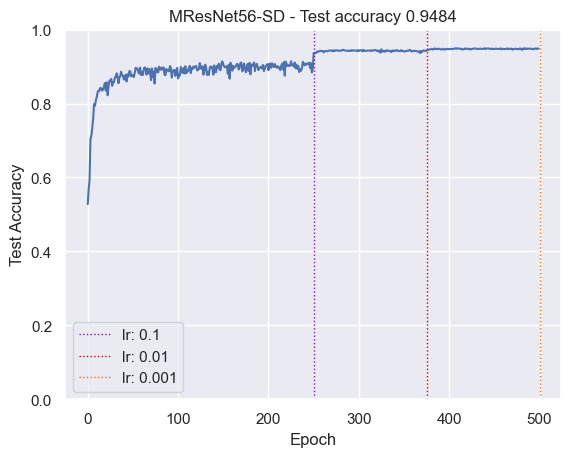

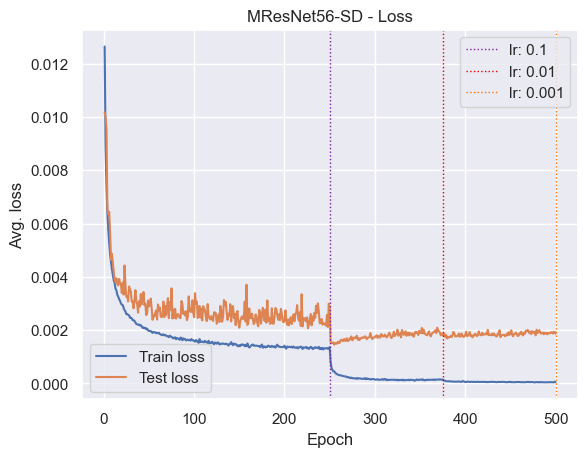

In [7]:
with open(p) as f:
    lines = f.read()

data = re.findall(
    r"Epoch (\d+) finished, average loss: (\d+\.\d+)\n[\d\- :\.]*\nStarting testing\n[\d\- :\.]*\nCorrect: \d+, total: \d+, accuracy: (\d+\.\d+), average loss: (\d+\.\d+)",
    lines,
    re.MULTILINE,
)
# print(len(data))
# print(data)
epochs = [int(x[0]) for x in data]
losses = [float(x[1]) for x in data]
accuracies = [float(x[2]) for x in data]
test_losses = [float(x[3]) for x in data]

results_mresnet164 = dict(epochs=epochs, losses=losses, accuracies=accuracies, test_losses=test_losses)

fix, ax = plt.subplots()
ax.plot(accuracies)
ax.set_ylim(0, 1)
plt.title(f"{model_name} - Test accuracy {accuracies[-1]:.4f}")
plt.ylabel("Test Accuracy")
plt.xlabel("Epoch")
# ax.yaxis.set_major_locator(MultipleLocator(0.05))
cmap = plt.get_cmap("Pastel1")

for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    
plt.legend()
plt.show()

fix, ax = plt.subplots()
train_loss, = ax.plot(epochs, losses, label="Train loss")
test_loss, = ax.plot(epochs, test_losses, label="Test loss")
plt.title(f"{model_name} - Loss")
plt.ylabel("Avg. loss")
plt.xlabel("Epoch")
first_legend = plt.legend(handles=[train_loss, test_loss])

ax = plt.gca().add_artist(first_legend)

lrhs = []
for color, (epoch, value) in zip(["xkcd:purple", "xkcd:red", "xkcd:orange"], lr_dict.items()):
    lr_h = plt.axvline(x=epoch, label=f"lr: {value}", linestyle=":", linewidth=1, c=color)
    lrhs.append(lr_h)

plt.legend(handles=lrhs)
plt.show()

In [8]:
with open(f"{model_name}_ks.txt", "w") as f:
    for i, x in enumerate(net.ks, start=1):
        f.write(f"{i},{x.item()}\n") 